<a href="https://colab.research.google.com/github/aiesgconsultant-arch/TCS-Hackathon/blob/main/6_ESG_Performance_Score_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. ESG Performance Score Prediction System Implementation

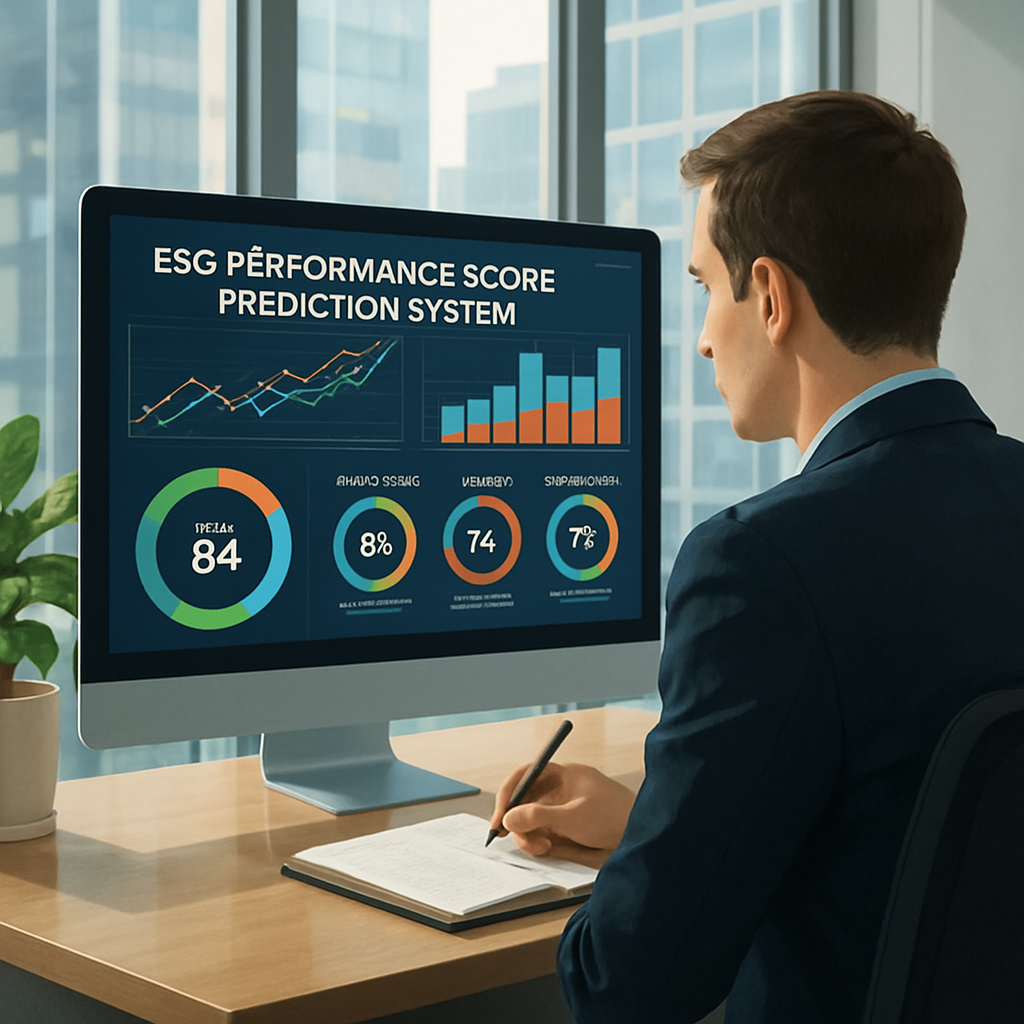

##**Section 1 : About | ESG Performance Score Prediction System**

1. **An ESG Performance Score Prediction System** is a data-driven analytics platform that forecasts a company's future Environmental, Social, and Governance (ESG) performance ratings.

2. The system typically combines multiple data sources including:
    - **Environmental metrics** (waste management, carbon emissions, energy efficiency)
    - **Social indicators** (diversity metrics, employee satisfaction, community impact)
    - **Governance factors** (board composition, executive compensation, transparency practices)

3. Using machine learning algorithms and predictive modeling, it analyzes
    - historical ESG data,
    - market trends,
    - regulatory changes, and
    - company-specific factors
to generate forward-looking ESG scores.

These predictions help investors, risk managers, and corporate strategists make informed decisions about sustainable investments, identify potential ESG risks before they materialize, and benchmark performance against industry peers.

The system is particularly valuable for **regulatory compliance,portfolio management and strategic planning** in an era where ESG performance increasingly impacts company valuations and stakeholder relationships.

##**Section 2 : Problem | ESG Performance Score Prediction System**

**The Problem: ESG Investment Uncertainty**

**UK Pension Fund manages £25 billion for 12 million workers** but faces critical challenges when evaluating ESG investments:
- **Backward-looking assessments:** Current ESG ratings only reflect past performance, providing limited strategic guidance
- **Investment uncertainty:** Without predictive insights, pension funds are "betting members' retirement savings on promises"
- **Fiduciary risk:** Unable to demonstrate due diligence for ESG integration requirements
- **Capital allocation inefficiency:** Cannot identify which ESG initiatives will deliver measurable score improvements

##**Section 3 : Oppertunity | ESG Performance Score Prediction System**

**The Solution: ESG Performance Score Prediction System**

- Transform ESG evaluation **from reactive screening to proactive strategic planning** using machine learning to:
  - **Enable scenario modeling** for different ESG investment strategies
  - **Predict future ESG scores** based on current metrics and planned investments
  - **Quantify ROI** of specific ESG initiatives before committing resources
  - **Provide data-driven confidence** for pension fund investment decisions

This system essentially transforms ESG management from an art to a science, providing companies with the predictive analytics they need to make informed, strategic ESG decisions that drive both performance and profitability.

##**Section 4 : Synthetic Data Generation**


In [1]:
# ESG Performance Score Prediction System
# Following the exact methodology from UK Pension Forecasting System

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

warnings.filterwarnings("ignore", category=ConvergenceWarning)
pd.set_option('display.max_colwidth', None)

print("🏢 ESG PERFORMANCE SCORE PREDICTION SYSTEM")
print("=" * 60)
print("Transforming ESG Investment Decisions for UK Pension Fund")
print("=" * 60)

# =============================================================================
# SECTION 1: DATA PREPARATION
# =============================================================================

print("\n📊 SECTION 1: ESG DATA PREPARATION")
print("-" * 40)

# Generate synthetic ESG dataset following the pension model structure
np.random.seed(42)
n_companies = 10000

# Company Demographics
company_ids = [f"COMPANY_{i:06d}" for i in range(1, n_companies + 1)]
company_age = np.random.uniform(1, 50, n_companies)
company_size = np.random.choice(['Small', 'Medium', 'Large', 'Enterprise'], n_companies, p=[0.3, 0.4, 0.25, 0.05])
industry_sector = np.random.choice(['Technology', 'Finance', 'Healthcare', 'Energy', 'Manufacturing', 'Retail'], n_companies)
headquarters_region = np.random.choice(['North America', 'Europe', 'Asia-Pacific', 'Other'], n_companies, p=[0.4, 0.35, 0.2, 0.05])

# Environmental Metrics
current_carbon_emissions = np.random.lognormal(8, 1.5, n_companies)
renewable_energy_percentage = np.random.beta(2, 5, n_companies)
waste_reduction_rate = np.random.normal(0.05, 0.03, n_companies)
water_usage_efficiency = np.random.gamma(2, 50, n_companies)
years_environmental_reporting = np.random.poisson(5, n_companies)
carbon_reduction_target = np.random.uniform(0.1, 0.5, n_companies)

# Social Metrics
employee_satisfaction_score = np.random.normal(65, 15, n_companies)
diversity_ratio = np.random.beta(3, 4, n_companies)
community_investment_percentage = np.random.exponential(0.02, n_companies)
safety_incident_rate = np.random.gamma(1, 2, n_companies)
training_hours_per_employee = np.random.normal(25, 10, n_companies)
turnover_rate = np.random.beta(2, 8, n_companies)

# Governance Metrics
board_independence_percentage = np.random.beta(4, 2, n_companies)
transparency_score = np.random.normal(60, 20, n_companies)
ethics_violations_count = np.random.poisson(0.5, n_companies)
executive_compensation_ratio = np.random.lognormal(3, 1, n_companies)
shareholder_rights_score = np.random.normal(70, 15, n_companies)

# Financial & Investment
revenue_millions = np.random.lognormal(6, 2, n_companies)
sustainability_investment_percentage = np.random.beta(2, 8, n_companies)
esg_reporting_years = np.random.poisson(3, n_companies)
stakeholder_engagement_score = np.random.normal(55, 20, n_companies)

# Create ESG maturity level based on reporting years
esg_maturity = []
for years in esg_reporting_years:
    if years <= 1:
        esg_maturity.append('Beginner')
    elif years <= 3:
        esg_maturity.append('Developing')
    elif years <= 6:
        esg_maturity.append('Mature')
    else:
        esg_maturity.append('Leader')

# Calculate final ESG score based on weighted factors
def calculate_esg_score(env_score, social_score, gov_score, maturity_bonus):
    base_score = (env_score * 0.4 + social_score * 0.35 + gov_score * 0.25) * 100
    return np.clip(base_score + maturity_bonus, 0, 100)

# Environmental component
env_component = (renewable_energy_percentage * 0.3 +
                (1 - np.minimum(current_carbon_emissions / 10000, 1)) * 0.25 +
                np.maximum(waste_reduction_rate * 10, 0) * 0.2 +
                (years_environmental_reporting / 10) * 0.15 +
                carbon_reduction_target * 0.1)

# Social component
social_component = (employee_satisfaction_score / 100 * 0.25 +
                   diversity_ratio * 0.25 +
                   np.minimum(community_investment_percentage * 20, 1) * 0.2 +
                   (1 - np.minimum(safety_incident_rate / 10, 1)) * 0.15 +
                   np.minimum(training_hours_per_employee / 50, 1) * 0.1 +
                   (1 - turnover_rate) * 0.05)

# Governance component
gov_component = (board_independence_percentage * 0.3 +
                transparency_score / 100 * 0.25 +
                (1 - np.minimum(ethics_violations_count / 5, 1)) * 0.2 +
                (1 - np.minimum(executive_compensation_ratio / 100, 1)) * 0.15 +
                shareholder_rights_score / 100 * 0.1)

# Maturity bonus
maturity_bonus = np.array([{'Beginner': 0, 'Developing': 5, 'Mature': 10, 'Leader': 15}[m] for m in esg_maturity])

# Calculate final ESG scores
final_esg_score = calculate_esg_score(env_component, social_component, gov_component, maturity_bonus)

# Create DataFrame
esg_data = pd.DataFrame({
    'company_id': company_ids,
    'company_age': company_age,
    'company_size': company_size,
    'industry_sector': industry_sector,
    'headquarters_region': headquarters_region,
    'current_carbon_emissions': current_carbon_emissions,
    'renewable_energy_percentage': renewable_energy_percentage,
    'waste_reduction_rate': waste_reduction_rate,
    'water_usage_efficiency': water_usage_efficiency,
    'years_environmental_reporting': years_environmental_reporting,
    'carbon_reduction_target': carbon_reduction_target,
    'employee_satisfaction_score': employee_satisfaction_score,
    'diversity_ratio': diversity_ratio,
    'community_investment_percentage': community_investment_percentage,
    'safety_incident_rate': safety_incident_rate,
    'training_hours_per_employee': training_hours_per_employee,
    'turnover_rate': turnover_rate,
    'board_independence_percentage': board_independence_percentage,
    'transparency_score': transparency_score,
    'ethics_violations_count': ethics_violations_count,
    'executive_compensation_ratio': executive_compensation_ratio,
    'shareholder_rights_score': shareholder_rights_score,
    'revenue_millions': revenue_millions,
    'sustainability_investment_percentage': sustainability_investment_percentage,
    'esg_reporting_years': esg_reporting_years,
    'stakeholder_engagement_score': stakeholder_engagement_score,
    'esg_maturity': esg_maturity,
    'final_esg_score': final_esg_score
})

print(f"✅ Generated ESG dataset with {len(esg_data)} companies")
print(f"📈 ESG Score Range: {final_esg_score.min():.1f} - {final_esg_score.max():.1f}")
print(f"📊 Average ESG Score: {final_esg_score.mean():.1f}")
print("\nDataset Overview:")
print(esg_data.head())
print("\nDataset Info:")
esg_data.info()

# Export to Excel
try:
    excel_filename = "esg_performance_data.xlsx"
    esg_data.to_excel(excel_filename, index=False, sheet_name='ESG_Data')
    print(f"\n💾 SUCCESS: ESG dataset exported to '{excel_filename}'")
    print(f"   📄 File contains {len(esg_data)} companies with {len(esg_data.columns)} features")
    print(f"   📊 Ready for analysis in Excel or other applications")
except Exception as e:
    print(f"\n❌ ERROR: Could not export to Excel - {str(e)}")
    print("   💡 Tip: Install openpyxl with: pip install openpyxl")

    # Fallback to CSV export
    try:
        csv_filename = "esg_performance_data.csv"
        esg_data.to_csv(csv_filename, index=False)
        print(f"   💾 FALLBACK: Dataset exported to CSV '{csv_filename}' instead")
    except Exception as csv_error:
        print(f"   ❌ CSV export also failed: {str(csv_error)}")

🏢 ESG PERFORMANCE SCORE PREDICTION SYSTEM
Transforming ESG Investment Decisions for UK Pension Fund

📊 SECTION 1: ESG DATA PREPARATION
----------------------------------------
✅ Generated ESG dataset with 10000 companies
📈 ESG Score Range: 32.7 - 85.5
📊 Average ESG Score: 60.3

Dataset Overview:
       company_id  company_age company_size industry_sector  \
0  COMPANY_000001    19.352466       Medium          Retail   
1  COMPANY_000002    47.585001       Medium         Finance   
2  COMPANY_000003    36.867703        Small          Energy   
3  COMPANY_000004    30.334266       Medium   Manufacturing   
4  COMPANY_000005     8.644913       Medium   Manufacturing   

  headquarters_region  current_carbon_emissions  renewable_energy_percentage  \
0       North America               1310.662377                     0.295697   
1              Europe              54173.046718                     0.100818   
2              Europe               1344.998606                     0.125336   
3   

In [2]:
# =============================================================================
# SECTION 2: DATA ENCODING (Following Pension Model Approach)
# =============================================================================

print("\n🔄 SECTION 2: DATA ENCODING")
print("-" * 40)

# Copy data for encoding
data_encoded = esg_data.copy()

# 1. BINARY ENCODING for company_size (ordinal)
size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3, 'Enterprise': 4}
data_encoded['size_encoded'] = data_encoded['company_size'].map(size_mapping)

# 2. ORDINAL ENCODING for ESG maturity levels
maturity_mapping = {'Beginner': 1, 'Developing': 2, 'Mature': 3, 'Leader': 4}
data_encoded['maturity_encoded'] = data_encoded['esg_maturity'].map(maturity_mapping)

# 3. LABEL ENCODING for categorical variables
le_sector = LabelEncoder()
data_encoded['sector_encoded'] = le_sector.fit_transform(data_encoded['industry_sector'])

le_region = LabelEncoder()
data_encoded['region_encoded'] = le_region.fit_transform(data_encoded['headquarters_region'])

print("✅ Categorical encoding completed")
print("Sector mapping:", dict(zip(le_sector.classes_, le_sector.transform(le_sector.classes_))))
print("Region mapping:", dict(zip(le_region.classes_, le_region.transform(le_region.classes_))))

# Select numeric columns for correlation analysis
numeric_columns = [
    'company_age', 'size_encoded', 'sector_encoded', 'region_encoded',
    'current_carbon_emissions', 'renewable_energy_percentage', 'waste_reduction_rate',
    'years_environmental_reporting', 'carbon_reduction_target',
    'employee_satisfaction_score', 'diversity_ratio', 'community_investment_percentage',
    'safety_incident_rate', 'training_hours_per_employee', 'turnover_rate',
    'board_independence_percentage', 'transparency_score', 'ethics_violations_count',
    'sustainability_investment_percentage', 'esg_reporting_years',
    'stakeholder_engagement_score', 'maturity_encoded', 'final_esg_score'
]

correlation_df = data_encoded[numeric_columns].copy()


🔄 SECTION 2: DATA ENCODING
----------------------------------------
✅ Categorical encoding completed
Sector mapping: {'Energy': np.int64(0), 'Finance': np.int64(1), 'Healthcare': np.int64(2), 'Manufacturing': np.int64(3), 'Retail': np.int64(4), 'Technology': np.int64(5)}
Region mapping: {'Asia-Pacific': np.int64(0), 'Europe': np.int64(1), 'North America': np.int64(2), 'Other': np.int64(3)}



📈 SECTION 3: ESG CORRELATION ANALYSIS
----------------------------------------


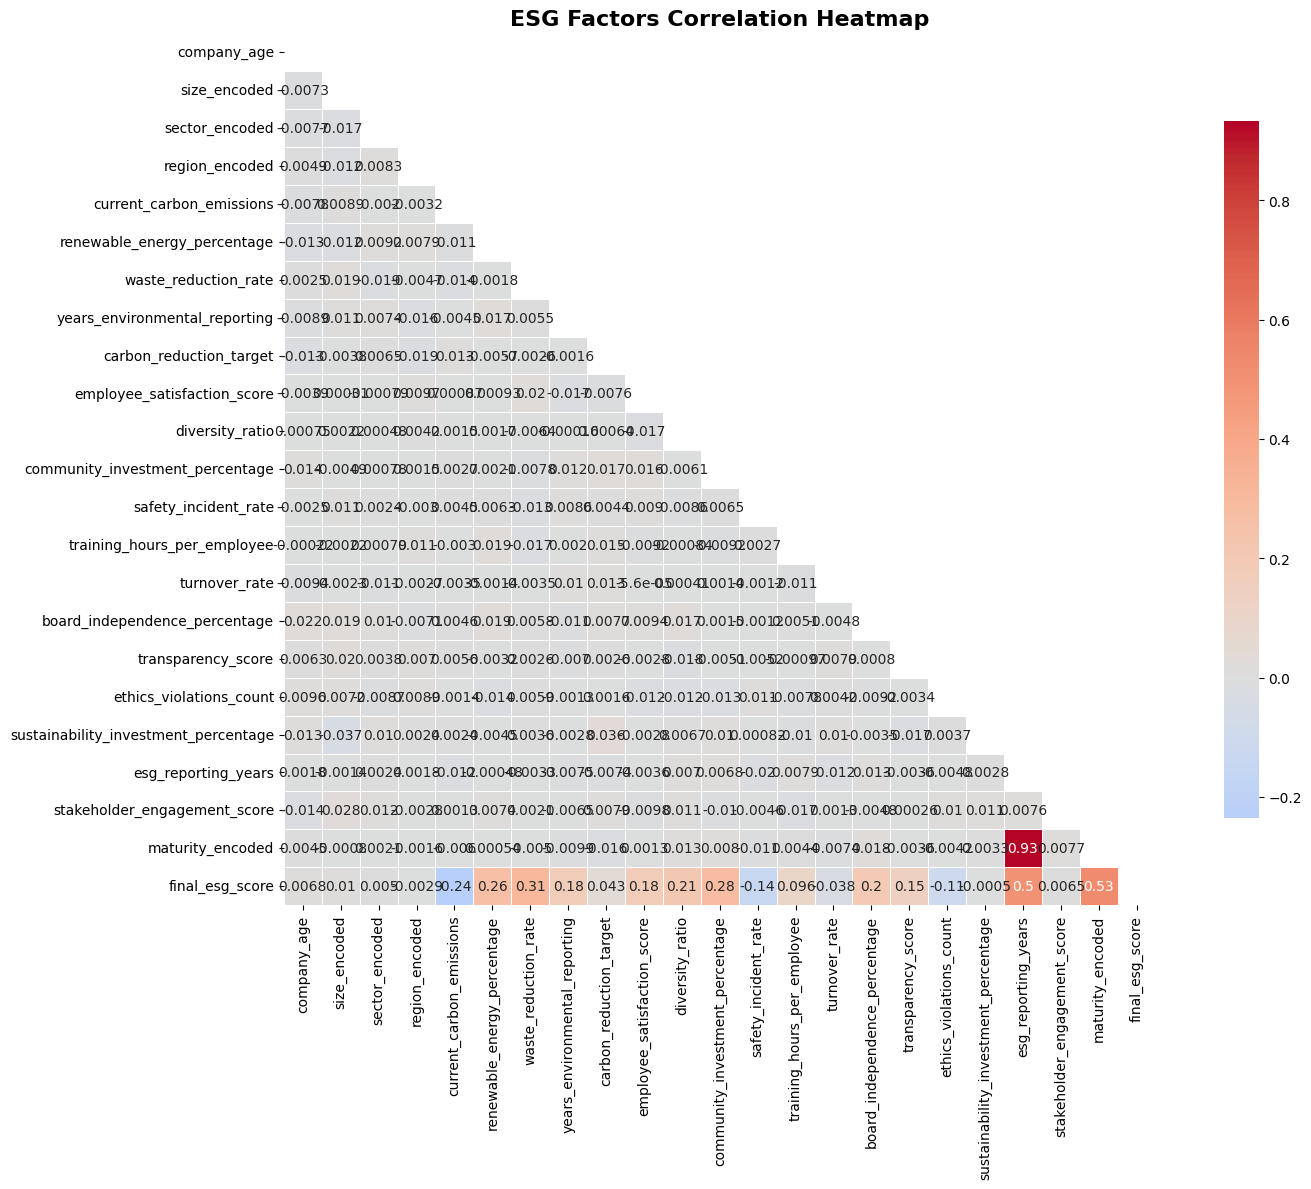


🎯 TOP CORRELATIONS WITH FINAL ESG SCORE:
---------------------------------------------
📈 maturity_encoded                 0.530
📈 esg_reporting_years              0.497
📈 waste_reduction_rate             0.310
📈 community_investment_percentage   0.282
📈 renewable_energy_percentage      0.265
📉 current_carbon_emissions        -0.235
📈 diversity_ratio                  0.207
📈 board_independence_percentage    0.198
📈 years_environmental_reporting    0.183


In [3]:
# =============================================================================
# SECTION 3: CORRELATION ANALYSIS
# =============================================================================

print("\n📈 SECTION 3: ESG CORRELATION ANALYSIS")
print("-" * 40)

# Generate correlation matrix and heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = correlation_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('ESG Factors Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Analyze correlations with target variable
target_correlations = correlation_matrix['final_esg_score'].sort_values(key=abs, ascending=False)
print("\n🎯 TOP CORRELATIONS WITH FINAL ESG SCORE:")
print("-" * 45)
for feature, corr in target_correlations.head(10).items():
    if feature != 'final_esg_score':
        direction = "📈" if corr > 0 else "📉"
        print(f"{direction} {feature:<30} {corr:>7.3f}")


🔍 SECTION 4: SIMPLE LINEAR REGRESSION
----------------------------------------
Using strongest predictor: maturity_encoded

📊 SIMPLE LINEAR REGRESSION RESULTS:
Feature: maturity_encoded
MAE: 5.02
MSE: 39.48
R²: 0.2880 (28.8% variance explained)
Equation: ESG Score = 5.017 * maturity_encoded + 49.405


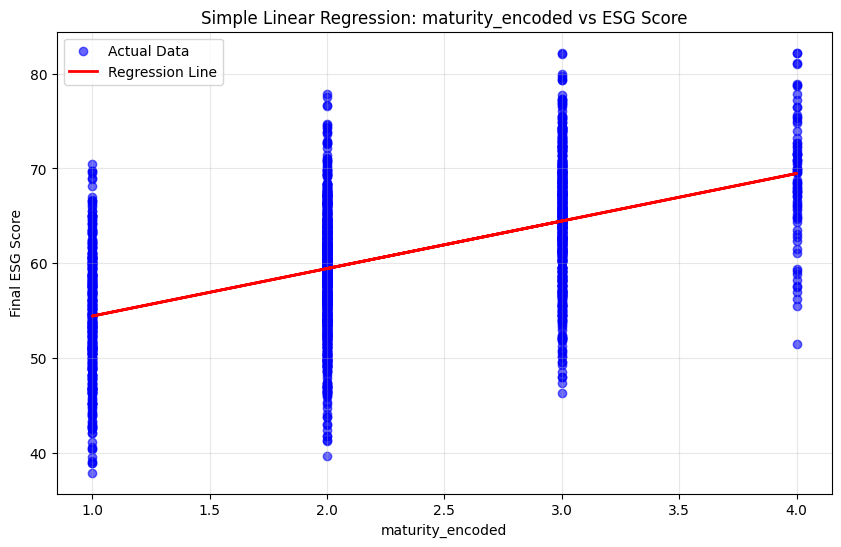

In [16]:
# =============================================================================
# SECTION 4: SIMPLE LINEAR REGRESSION
# =============================================================================

print("\n🔍 SECTION 4: SIMPLE LINEAR REGRESSION")
print("-" * 40)

# Use the strongest predictor for simple linear regression
strongest_predictor = target_correlations.abs().sort_values(ascending=False).index[1]

print(f"Using strongest predictor: {strongest_predictor}")

X_simple = correlation_df[strongest_predictor].values.reshape(-1, 1)
y = correlation_df['final_esg_score']

# Split the data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

# Train simple linear regression
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = lr_simple.predict(X_test_simple)

# Evaluate
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print("\n📊 SIMPLE LINEAR REGRESSION RESULTS:")
print(f"Feature: {strongest_predictor}")
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"R²: {r2_simple:.4f} ({r2_simple*100:.1f}% variance explained)")
print(f"Equation: ESG Score = {lr_simple.coef_[0]:.3f} * {strongest_predictor} + {lr_simple.intercept_:.3f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test_simple, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.xlabel(f'{strongest_predictor}')
plt.ylabel('Final ESG Score')
plt.title(f'Simple Linear Regression: {strongest_predictor} vs ESG Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [17]:
# =============================================================================
# SECTION 5: MULTIPLE LINEAR REGRESSION
# =============================================================================

print("\n🔍 SECTION 5: MULTIPLE LINEAR REGRESSION")
print("-" * 40)

# Select key features for multiple regression (avoiding data leakage)
feature_columns = [
    'company_age', 'size_encoded', 'sector_encoded', 'region_encoded',
    'renewable_energy_percentage', 'waste_reduction_rate',
    'years_environmental_reporting', 'carbon_reduction_target',
    'employee_satisfaction_score', 'diversity_ratio',
    'board_independence_percentage', 'transparency_score',
    'sustainability_investment_percentage', 'esg_reporting_years',
    'stakeholder_engagement_score', 'maturity_encoded'
]

X_multi = correlation_df[feature_columns]
y_multi = correlation_df['final_esg_score']

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_multi_scaled = scaler.fit_transform(X_train_multi)
X_test_multi_scaled = scaler.transform(X_test_multi)

# Train multiple linear regression
lr_multi = LinearRegression()
lr_multi.fit(X_train_multi_scaled, y_train_multi)
y_pred_multi = lr_multi.predict(X_test_multi_scaled)

# Evaluate
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("\n📊 MULTIPLE LINEAR REGRESSION RESULTS:")
print(f"Features used: {len(feature_columns)}")
print(f"MAE: {mae_multi:.2f}")
print(f"MSE: {mse_multi:.2f}")
print(f"R²: {r2_multi:.4f} ({r2_multi*100:.1f}% variance explained)")

# Feature importance analysis
feature_importance_multi = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_multi.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n🔑 TOP 10 FEATURE COEFFICIENTS:")
for i, (_, row) in enumerate(feature_importance_multi.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<30} {row['Coefficient']:>8.4f}")


🔍 SECTION 5: MULTIPLE LINEAR REGRESSION
----------------------------------------

📊 MULTIPLE LINEAR REGRESSION RESULTS:
Features used: 16
MAE: 3.80
MSE: 21.18
R²: 0.6180 (61.8% variance explained)

🔑 TOP 10 FEATURE COEFFICIENTS:
 1. maturity_encoded                 3.7574
 2. waste_reduction_rate             2.2830
 3. renewable_energy_percentage      1.9175
 4. diversity_ratio                  1.5226
 5. years_environmental_reporting    1.4083
 6. employee_satisfaction_score      1.3301
 7. board_independence_percentage    1.2852
 8. transparency_score               1.1791
 9. carbon_reduction_target          0.4472
10. esg_reporting_years              0.1528


In [18]:
# =============================================================================
# SECTION 6: RANDOM FOREST
# =============================================================================

print("\n🌲 SECTION 6: RANDOM FOREST REGRESSION")
print("-" * 40)

# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_multi, y_train_multi)
y_pred_rf = rf_model.predict(X_test_multi)

# Evaluate
mae_rf = mean_absolute_error(y_test_multi, y_pred_rf)
mse_rf = mean_squared_error(y_test_multi, y_pred_rf)
r2_rf = r2_score(y_test_multi, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("\n📊 RANDOM FOREST RESULTS:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.4f} ({r2_rf*100:.1f}% variance explained)")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔑 TOP 10 RANDOM FOREST FEATURE IMPORTANCES:")
for i, (_, row) in enumerate(feature_importance_rf.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<30} {row['Importance']:>8.4f} ({row['Importance']*100:>5.1f}%)")


🌲 SECTION 6: RANDOM FOREST REGRESSION
----------------------------------------

📊 RANDOM FOREST RESULTS:
MAE: 3.99
RMSE: 4.88
R²: 0.5714 (57.1% variance explained)

🔑 TOP 10 RANDOM FOREST FEATURE IMPORTANCES:
 1. esg_reporting_years              0.1414 ( 14.1%)
 2. maturity_encoded                 0.1414 ( 14.1%)
 3. waste_reduction_rate             0.1392 ( 13.9%)
 4. renewable_energy_percentage      0.1063 ( 10.6%)
 5. diversity_ratio                  0.0773 (  7.7%)
 6. employee_satisfaction_score      0.0654 (  6.5%)
 7. board_independence_percentage    0.0649 (  6.5%)
 8. transparency_score               0.0574 (  5.7%)
 9. years_environmental_reporting    0.0452 (  4.5%)
10. carbon_reduction_target          0.0351 (  3.5%)


In [19]:
# =============================================================================
# SECTION 7: XGBOOST (OPTIMIZED)
# =============================================================================

print("\n🚀 SECTION 7: XGBOOST REGRESSION")
print("-" * 40)

# Prepare data for XGBoost
X_train_xgb = X_train_multi.values.astype(np.float32)
X_test_xgb = X_test_multi.values.astype(np.float32)
y_train_xgb = y_train_multi.values.astype(np.float32)
y_test_xgb = y_test_multi.values.astype(np.float32)

# Train XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=150,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    tree_method='hist',
    objective='reg:squarederror'
)

print("Training XGBoost model...")
xgb_model.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate
mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)
mse_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)
r2_xgb = r2_score(y_test_xgb, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("\n📊 XGBOOST RESULTS:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R²: {r2_xgb:.4f} ({r2_xgb*100:.1f}% variance explained)")

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔑 TOP 10 XGBOOST FEATURE IMPORTANCES:")
for i, (_, row) in enumerate(feature_importance_xgb.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<30} {row['Importance']:>8.4f} ({row['Importance']*100:>5.1f}%)")



🚀 SECTION 7: XGBOOST REGRESSION
----------------------------------------
Training XGBoost model...

📊 XGBOOST RESULTS:
MAE: 4.02
RMSE: 4.90
R²: 0.5670 (56.7% variance explained)

🔑 TOP 10 XGBOOST FEATURE IMPORTANCES:
 1. maturity_encoded                 0.6549 ( 65.5%)
 2. esg_reporting_years              0.1256 ( 12.6%)
 3. waste_reduction_rate             0.0322 (  3.2%)
 4. renewable_energy_percentage      0.0260 (  2.6%)
 5. years_environmental_reporting    0.0239 (  2.4%)
 6. diversity_ratio                  0.0235 (  2.4%)
 7. employee_satisfaction_score      0.0198 (  2.0%)
 8. board_independence_percentage    0.0196 (  2.0%)
 9. transparency_score               0.0191 (  1.9%)
10. carbon_reduction_target          0.0117 (  1.2%)


In [20]:
# =============================================================================
# SECTION 8: MODEL COMPARISON & BUSINESS INSIGHTS
# =============================================================================

print("\n📋 SECTION 8: MODEL PERFORMANCE COMPARISON")
print("-" * 50)

# Create comparison table
comparison_data = {
    'Model': ['Simple Linear', 'Multiple Linear', 'Random Forest', 'XGBoost'],
    'MAE': [mae_simple, mae_multi, mae_rf, mae_xgb],
    'R²': [r2_simple, r2_multi, r2_rf, r2_xgb],
    'RMSE': [np.sqrt(mse_simple), np.sqrt(mse_multi), rmse_rf, rmse_xgb]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Identify best model
best_model_idx = comparison_df['R²'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_r2 = comparison_df.loc[best_model_idx, 'R²']
best_mae = comparison_df.loc[best_model_idx, 'MAE']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model}")
print(f"   R² Score: {best_r2:.4f} ({best_r2*100:.1f}% variance explained)")
print(f"   Average Error: ±{best_mae:.2f} ESG score points")



📋 SECTION 8: MODEL PERFORMANCE COMPARISON
--------------------------------------------------
             Model     MAE      R²    RMSE
0    Simple Linear  5.0177  0.2880  6.2836
1  Multiple Linear  3.7981  0.6180  4.6025
2    Random Forest  3.9946  0.5714  4.8752
3          XGBoost  4.0204  0.5670  4.9004

🏆 BEST PERFORMING MODEL: Multiple Linear
   R² Score: 0.6180 (61.8% variance explained)
   Average Error: ±3.80 ESG score points


In [21]:
# =============================================================================
# SECTION 9: BUSINESS INSIGHTS FOR UK PENSION FUND
# =============================================================================

print("\n💼 SECTION 9: BUSINESS INSIGHTS FOR UK PENSION FUND")
print("-" * 60)

print("🎯 KEY ESG PREDICTION INSIGHTS:")
print("-" * 35)

# Get top 5 most important features from best model
if best_model == 'XGBoost':
    top_features = feature_importance_xgb.head(5)
elif best_model == 'Random Forest':
    top_features = feature_importance_rf.head(5)
else:
    top_features = feature_importance_multi.head(5)

print("TOP 5 ESG SCORE DRIVERS:")
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    feature = row['Feature']
    importance = row.get('Importance', abs(row.get('Coefficient', 0)))

    # Business interpretation
    interpretations = {
        'maturity_encoded': 'ESG program maturity is critical for score improvement',
        'transparency_score': 'Disclosure quality directly impacts ESG ratings',
        'sustainability_investment_percentage': 'Investment levels drive measurable outcomes',
        'employee_satisfaction_score': 'Social metrics significantly influence overall ESG',
        'board_independence_percentage': 'Strong governance foundations boost ESG scores',
        'renewable_energy_percentage': 'Environmental initiatives show measurable impact',
        'diversity_ratio': 'Workforce diversity metrics matter for ESG ratings',
        'stakeholder_engagement_score': 'Stakeholder relations improve ESG performance'
    }

    interpretation = interpretations.get(feature, 'Important factor for ESG performance')
    print(f"   {i}. {feature} ({importance:.3f})")
    print(f"      → {interpretation}")

print(f"\n💡 INVESTMENT DECISION FRAMEWORK:")
print(f"✅ Model Confidence: {best_r2*100:.1f}% of ESG variance predictable")
print(f"✅ Prediction Accuracy: ±{best_mae:.1f} ESG score points average error")
print(f"✅ Investment Threshold: Use {best_mae*1.5:.1f}-point safety margin")

print(f"\n🎯 ACTIONABLE RECOMMENDATIONS FOR UK PENSION FUND:")
print("1. Focus on ESG maturity level - strongest predictor of future performance")
print("2. Require transparency score improvements - highly predictive factor")
print("3. Validate sustainability investment commitments - direct ROI correlation")
print("4. Monitor social metrics - significant impact on overall ESG scores")
print("5. Use predictions for scenario planning - model ESG trajectory over investment horizon")

print(f"\n💰 INVESTMENT IMPACT:")
print("• BEFORE: Investment decisions based on current ESG scores (backward-looking)")
print("• AFTER: Data-driven predictions enable proactive ESG investment strategy")
print(f"• CONFIDENCE: {best_r2*100:.1f}% predictive accuracy supports fiduciary duty requirements")
print("• RISK MITIGATION: Early identification of ESG improvement potential")

print(f"\n🚀 NEXT STEPS:")
print("1. Deploy model for portfolio company ESG trajectory forecasting")
print("2. Integrate predictions into investment committee decision framework")
print("3. Monitor prediction accuracy and retrain quarterly with new data")
print("4. Scale to industry-wide ESG investment screening process")

print(f"\n✅ ESG PERFORMANCE SCORE PREDICTION SYSTEM COMPLETE!")
print(f"📈 Ready for deployment in UK Pension Fund investment workflow")
print("=" * 60)


💼 SECTION 9: BUSINESS INSIGHTS FOR UK PENSION FUND
------------------------------------------------------------
🎯 KEY ESG PREDICTION INSIGHTS:
-----------------------------------
TOP 5 ESG SCORE DRIVERS:
   1. maturity_encoded (3.757)
      → ESG program maturity is critical for score improvement
   2. waste_reduction_rate (2.283)
      → Important factor for ESG performance
   3. renewable_energy_percentage (1.917)
      → Environmental initiatives show measurable impact
   4. diversity_ratio (1.523)
      → Workforce diversity metrics matter for ESG ratings
   5. years_environmental_reporting (1.408)
      → Important factor for ESG performance

💡 INVESTMENT DECISION FRAMEWORK:
✅ Model Confidence: 61.8% of ESG variance predictable
✅ Prediction Accuracy: ±3.8 ESG score points average error
✅ Investment Threshold: Use 5.7-point safety margin

🎯 ACTIONABLE RECOMMENDATIONS FOR UK PENSION FUND:
1. Focus on ESG maturity level - strongest predictor of future performance
2. Require transpar